In [64]:
!wget --no-check-certificate "https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145897&authkey=AAQKZ0FhjjfkhcM"

--2019-05-23 19:21:58--  https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145897&authkey=AAQKZ0FhjjfkhcM
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mmrwyw.am.files.1drv.com/y4m2Z6P9k70vEzj432tFCg2HBOh5DRaoP13xPQ7nMTqGUj_sabWdBlXU-oaEGjVOFEjizfjOqBJjSnJ7VSDDjFYxGWxy2uO8sUmdS6lajtGsBTFpGNa0QetEH7P1dXPZj5CGKLQ7T1-htrKeQbcgyq5Mxi7jbSS2sozX7HFn4Mw4LxNEzZHimYEOOm2MOcg1tpw313zPzFAA_z3SaLUdVMeOw/50k_All_Parking_Spaces.zip?download&psid=1 [following]
--2019-05-23 19:22:00--  https://mmrwyw.am.files.1drv.com/y4m2Z6P9k70vEzj432tFCg2HBOh5DRaoP13xPQ7nMTqGUj_sabWdBlXU-oaEGjVOFEjizfjOqBJjSnJ7VSDDjFYxGWxy2uO8sUmdS6lajtGsBTFpGNa0QetEH7P1dXPZj5CGKLQ7T1-htrKeQbcgyq5Mxi7jbSS2sozX7HFn4Mw4LxNEzZHimYEOOm2MOcg1tpw313zPzFAA_z3SaLUdVMeOw/50k_All_Parking_Spaces.zip?download&psid=1
Resolving mmrwyw.am.files.1drv.

In [65]:
!unzip -q "download?cid=11F71A1654195330&resid=11F71A1654195330!45897&authkey=AAQKZ0FhjjfkhcM"

replace 50k_All_Parking_Spaces/test/Empty/O_2015-11-16_07.10_C01_185.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [66]:
import numpy as np
import tensorflow as tf
from keras import models
from keras import layers
import os
from keras import applications


IMG_HEIGHT = 60
IMG_WIDTH = 60

vgg16_model = applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(60, 60, 3))

vgg16_model.summary()

model = models.Sequential()
for layer in vgg16_model.layers:
  model.add(layer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 60, 60, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 60, 60, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 60, 60, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 30, 30, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 30, 30, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 30, 30, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 15, 15, 128)       0         
__________

In [0]:
for layer in model.layers:
  layer.trainable = False
  
model.add(layers.Flatten(input_shape=model.output_shape[1:]))
model.add(layers.Dense(256, use_bias=False))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Dense(128, use_bias=False))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Dense(64, use_bias=False))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [68]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 60, 60, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 60, 60, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 30, 30, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 30, 30, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 30, 30, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 15, 15, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 15, 15, 256)       295168    
__________

In [69]:
from keras.preprocessing.image import ImageDataGenerator

data_dir = './50k_All_Parking_Spaces'

base_train_dir = os.path.join(data_dir, 'train')
base_val_dir = os.path.join(data_dir, 'test')


train_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        base_train_dir,
        target_size=(IMG_SIZE_HEIGTH, IMG_SIZE_WIDTH),
        batch_size=128,
        class_mode='binary'
        )

validation_generator = val_datagen.flow_from_directory(
        base_val_dir,
        target_size=(IMG_SIZE_HEIGTH, IMG_SIZE_WIDTH),
        batch_size=128,
        class_mode='binary'
        )

Found 43448 images belonging to 2 classes.
Found 9999 images belonging to 2 classes.


In [70]:
from keras. callbacks import EarlyStopping

es = EarlyStopping(monitor='val_acc', patience=10, restore_best_weights=True)

history = model.fit_generator(
                              train_generator,
                              steps_per_epoch=339, 
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=78, 
                              callbacks=[es]
                             )

Epoch 1/100
339/339 [==============================] - 64s 188ms/step - loss: 0.0462 - acc: 0.9849 - val_loss: 0.2669 - val_acc: 0.8945
Epoch 2/100
339/339 [==============================] - 62s 182ms/step - loss: 0.0094 - acc: 0.9976 - val_loss: 0.2986 - val_acc: 0.9149
Epoch 3/100
339/339 [==============================] - 62s 184ms/step - loss: 0.0069 - acc: 0.9981 - val_loss: 0.4747 - val_acc: 0.8885
Epoch 4/100
339/339 [==============================] - 63s 185ms/step - loss: 0.0048 - acc: 0.9984 - val_loss: 0.3360 - val_acc: 0.9207
Epoch 5/100
339/339 [==============================] - 61s 180ms/step - loss: 0.0043 - acc: 0.9986 - val_loss: 0.3797 - val_acc: 0.9165
Epoch 6/100
339/339 [==============================] - 60s 177ms/step - loss: 0.0042 - acc: 0.9987 - val_loss: 0.4910 - val_acc: 0.8952
Epoch 7/100
339/339 [==============================] - 61s 181ms/step - loss: 0.0029 - acc: 0.9992 - val_loss: 0.3381 - val_acc: 0.9129
Epoch 8/100
339/339 [===========================

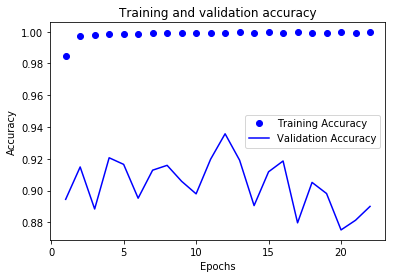

In [71]:
%matplotlib inline  
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" = Blauer Punkt
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
# "b" = Blaue Linie
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()